<a href="https://colab.research.google.com/github/tozanni/Projects/blob/master/Bias_Variance_Tradeoff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bias-Variance Tradeoff (Interpretación clásica)
### Saturdays.AI Latam

Eduardo H. Ramirez

https://www.linkedin.com/in/ehramirez/


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly  

def generate_noisy_points(s = 101):
  ''' 
  Generamos puntos entre 0 y 1 (uso s=101 para que los intervalos de x 
  sean cortos en decimales)
  ''' 
  x = np.linspace(0, 1 , s)  
  e = np.random.normal(0, 0.3, len(x))
  y = x**2 + e
  return x,y

def fit_poly(x,y,p):
  """
  Ajusta un polinomio de grado p a los datos, devuelve el valor de y_hat
  """
  coefs = poly.polyfit(x, y, p)
  print("Coeficientes del polinomio:")
  print(coefs)
  print()
  y_hat = poly.polyval(x, coefs)
  return y_hat

def plot_poly(x, y, y_hat):
  #plot_poly(x, y, y_hat)
  plt.plot(x, y, "b.")
  plt.plot(x, y_hat, "y-")


Primero queremos mostrar que al repetir los modelos, aquellos que tienen un alto sesgo (bias) no varian mucho entre sus distintas realizaciones (es decir, tienen baja varianza) 

Coeficientes del polinomio:
[0.36456371]

MSE: 0.16790854484481774
bias_sq: 0.16790854484481774 Var: 2.7733391199176196e-32


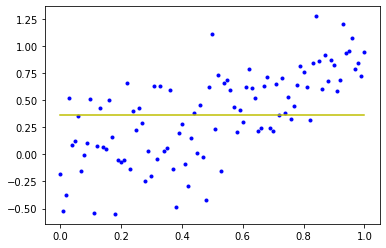

In [8]:
## Fitear un polinomio de grado 0 (constante)

#Generamos puntos con ruido
x,y = generate_noisy_points()

#Obtenemos el la funcion ajustada (y_hat)
p = 0
y_hat = fit_poly(x,y,p)

#Imprimir
plot_poly(x, y, y_hat)


Coeficientes del polinomio:
[-0.06092093  0.3109009   0.6296369 ]

MSE: 0.10676836161170049
bias_sq: 0.10676836161170049 Var: 0.07748272841691198


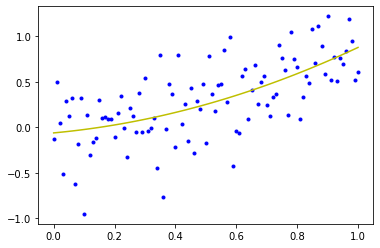

In [10]:
## Fitear un polinomio de grado 2
x,y = generate_noisy_points()

#Obtenemos el la funcion ajustada (y_hat)
p = 2
y_hat = fit_poly(x,y,p)


#Imprimir
plot_poly(x, y, y_hat)


Coeficientes del polinomio:
[ 3.43980316e-01 -2.48912238e+01  4.88889510e+02 -4.45610836e+03
  2.30852954e+04 -7.42387255e+04  1.54030019e+05 -2.06772650e+05
  1.73448577e+05 -8.25293138e+04  1.69696086e+04]

MSE: 0.05890960154625897
bias_sq: 0.05890960154625897 Var: 0.09896718937362525


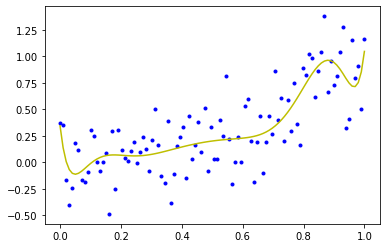

In [11]:
## Fitear un polinomio de grado 10
## ¿Qué pasa si el training set es de menor tamaño?

x,y = generate_noisy_points(100)
y_hat = fit_poly(x,y,10)


#Imprimir
plot_poly(x, y, y_hat)

In [ ]:
## Valor de la funcion real, sin ruido
def f(x):
  return x**2

def simula_bias_variance(p, gen=100):
  """
  p: grado del polinomio a ajustar
  gen: numero de generaciones a simular
  """
  pred_y = np.zeros(gen) #Inicializar arreglo para guardar predicciones
  x,y = generate_noisy_points()
  idx = 95   
  x0 = x[95] 
  true_y = np.repeat(f(x0),gen)  #array de 100 y's verdaderas

  for i in range(0, gen):
    x,y = generate_noisy_points()
    coefs = poly.polyfit(x, y, p)
    y_hat = poly.polyval(x0, coefs)
    pred_y[i] = y_hat
  
  # MSE (Ojo: este MSE es para multiples realizaciones del modelo en el mismo punto)
  mse  = np.mean((true_y - pred_y)**2)          
  bias_sq = (np.mean(pred_y) - true_y[0])**2
  var = np.mean((pred_y - np.mean(pred_y))**2)

  #Calculamos error total para demostrar la descomposicion
  total_error = bias_sq + var

  return {"MSE":mse, "Bias**2": bias_sq, "Var":var, "Total error": total_error}


In [ ]:
results = []

## Correr simulacion para polinomios de grado 0 a 10
for p in range(0,10):
  results.append(simula_bias_variance(p))


In [ ]:
rf = pd.DataFrame(results)
rf

,MSE,Bias**2,Var,Total error
0,0.322413,0.321448,0.000965,0.322413
1,0.017986,0.015279,0.002707,0.017986
2,0.004433,0.000426,0.004007,0.004433
3,0.005345,0.000167,0.005178,0.005345
4,0.006871,0.000092,0.006779,0.006871
5,0.005623,0.000030,0.005593,0.005623
6,0.005286,0.000003,0.005283,0.005286
7,0.009965,0.000013,0.009952,0.009965
8,0.011153,0.000277,0.010876,0.011153
9,0.012235,0.000415,0.011820,0.012235


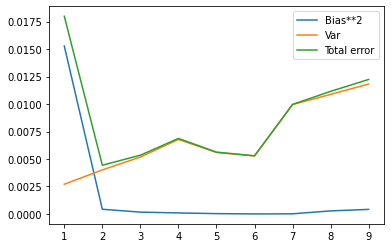

In [ ]:
# Ignoro el valor de p=0 de la gráfica para que se aprecie la forma de "bañera"
rf[1:][["Bias**2","Var","Total error"]].plot()